In [ ]:
#Netflix prize dataset
#importing the necessary libraries for importing the dataset
#Around100M+ ratings 4499 movies 480,000 users
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
netflix_dataset = pd.read_csv('combined_data_1.txt',header=None,names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [ ]:
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
netflix_dataset.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [ ]:
netflix_dataset.shape

(24058263, 2)

In [ ]:
netflix_dataset.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [ ]:
netflix_dataset.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [ ]:
#get the customer count with NaN values
movie_count=netflix_dataset.isnull().sum()
movie_count

Cust_Id       0
Rating     4499
dtype: int64

In [ ]:
#to claculate how many customers we are having in the dataset
Customer_count= netflix_dataset.Cust_Id.nunique()
Customer_count

475257

In [ ]:
Customer_count=Customer_count-movie_count
Customer_count

Cust_Id    475257
Rating     470758
dtype: int64

In [ ]:
netflix_dataset.Rating.unique()

array([nan,  3.,  5.,  4.,  2.,  1.])

In [ ]:
netflix_dataset.Rating.nunique()

5

In [ ]:
netflix_dataset.Rating.value_counts()

Rating
4.0    8085741
3.0    6904181
5.0    5506583
2.0    2439073
1.0    1118186
Name: count, dtype: int64

In [ ]:
#get the total number of ratings given by the customers
Rating_count=netflix_dataset.Cust_Id.count()-movie_count
Rating_count

Cust_Id    24058263
Rating     24053764
dtype: int64

In [ ]:
netflix_dataset.groupby('Rating').count()

,Cust_Id
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


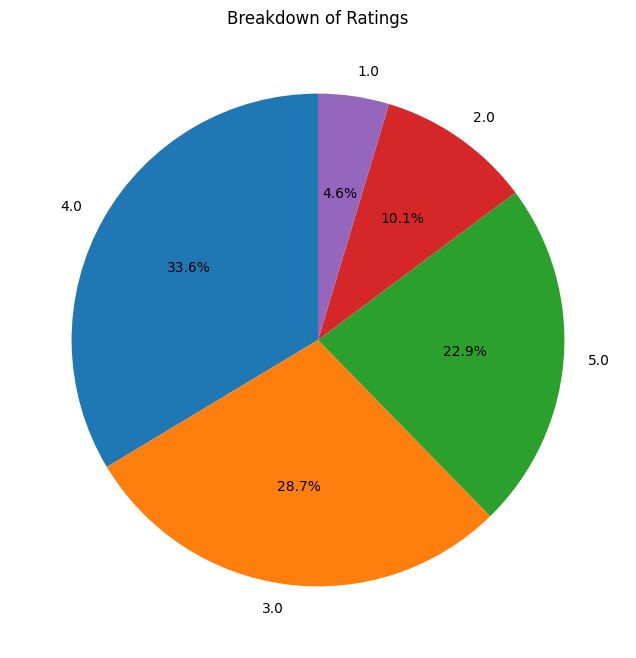

In [ ]:
rating_counts = netflix_dataset['Rating'].value_counts()
#To find out how many people have rated the movies as 1, 2, 3,4,5 stars ratings to the movies
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Breakdown of Ratings')
plt.show()

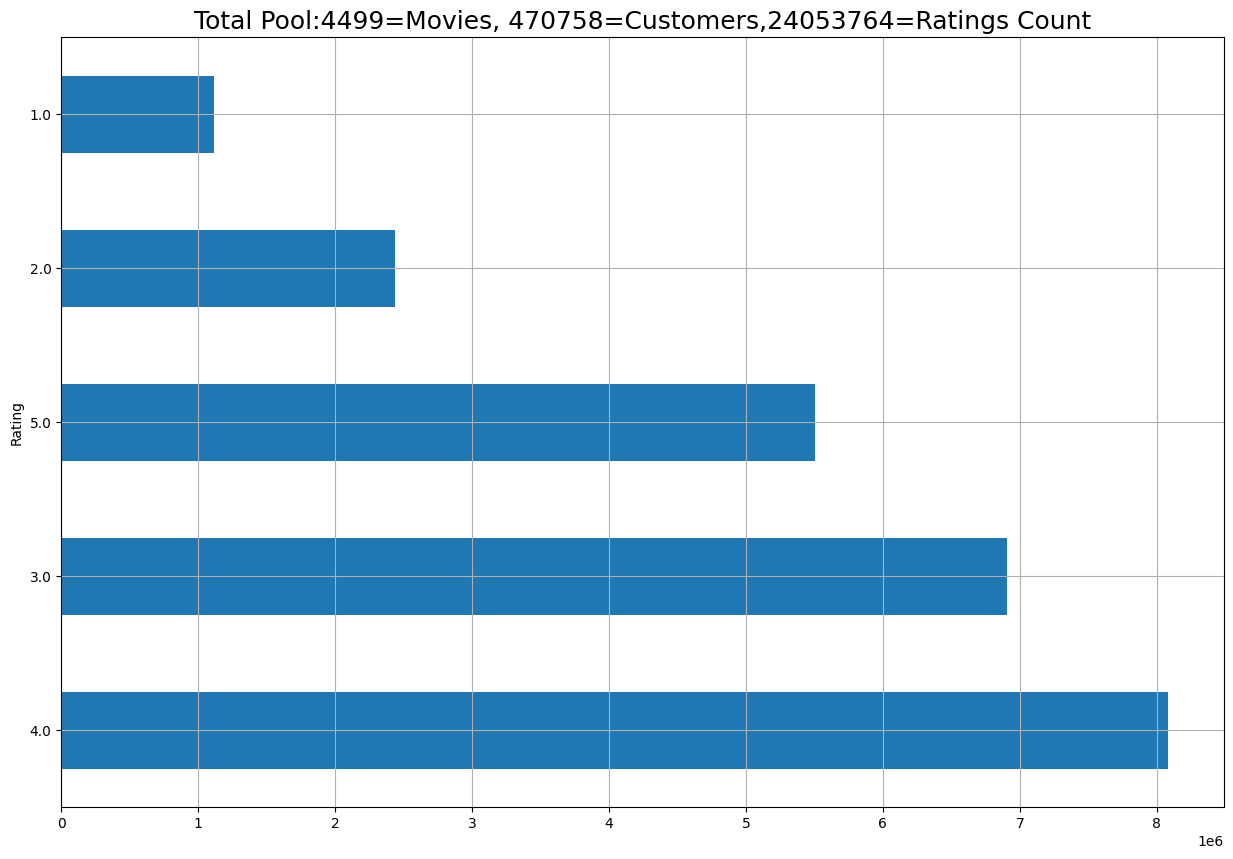

In [ ]:
ax= rating_counts.plot(kind='barh', legend=False,figsize=(15,10))
plt.title(f'Total Pool:{movie_count[1]}=Movies, {Customer_count[1] }=Customers,{Rating_count[1]}=Ratings Count' ,fontsize=18)
plt.grid()
plt.show()

In [ ]:
#add another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column

df_null=pd.DataFrame(netflix_dataset.Rating.isnull())
df_null

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [ ]:
df_null=df_null[df_null['Rating']==True]

In [ ]:
df_null

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [ ]:
#now we will reset the index as the column
df_null.reset_index(inplace=True)

In [ ]:
df_null

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [ ]:
df= netflix_dataset.copy()

In [ ]:
#extracts movie IDs from 'Cust_Id', populates them into a new 'movie_id' column,
#and removes rows with missing 'Rating' values.

current_movie_ids= None
movie_ids=[]

for cust_id in df['Cust_Id']:
  if ':' in cust_id:
    current_movie_ids= int(cust_id.replace(':',''))
  movie_ids.append(current_movie_ids)


df['movie_id']=movie_ids


df=df[df['Rating'].notna()]

In [ ]:
movie_ids

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
df.head()

,Cust_Id,Rating,movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [ ]:
df.tail()

,Cust_Id,Rating,movie_id
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499
24058262,1704416,3.0,4499


In [ ]:
df=df.reset_index().drop('index',axis=1)

In [ ]:
df.head()

,Cust_Id,Rating,movie_id
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1
4,823519,3.0,1


In [ ]:
netflix_dataset=df

In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,movie_id
0,1488844,3.0,1
1,822109,5.0,1
2,885013,4.0,1
3,30878,4.0,1
4,823519,3.0,1


In [ ]:
#now we will remove all the users that have rated less movies and
#also all those movies that has been rated less in numbers
dataset_movie_summary= netflix_dataset.groupby('movie_id').agg(['count','mean'])

In [ ]:
dataset_movie_summary

Cust_Id      Rating          
           count mean  count      mean
movie_id                              
1            547  inf    547  3.749543
2            145  inf    145  3.558621
3           2012  inf   2012  3.641153
4            142  inf    142  2.739437
5           1140  inf   1140  3.919298
...          ...  ...    ...       ...
4495         614  inf    614  3.478827
4496        9519  inf   9519  3.763000
4497         714  inf    714  2.715686
4498         269  inf    269  2.464684
4499         428  inf    428  2.614486

[4499 rows x 4 columns]

In [ ]:
dataset_movie_summary= netflix_dataset.groupby('movie_id')['Rating'].agg(['count','mean'])

In [ ]:
dataset_movie_summary

,count,mean
movie_id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [ ]:
#now we will store all the movie_id indexes in a variable dataset_movie_summary.index and convert the datatype to int
# dataset_movie_summary.index=dataset_movie_summary.index.map(int)

movie_benchmark= round(dataset_movie_summary['count'].quantile(0.7))
movie_benchmark

1799

In [ ]:
droping_movie_list=dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
droping_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='movie_id', length=3149)

In [ ]:
data_movie_summ= netflix_dataset.groupby('Cust_Id')['Rating'].agg(['count','mean'])

In [ ]:
data_movie_summ

,count,mean
Cust_Id,,
10,49,3.346939
1000004,1,5.000000
1000027,30,4.300000
1000033,101,3.316832
1000035,20,4.400000
...,...,...
999964,48,4.062500
999972,35,4.057143
999977,14,3.714286


In [ ]:
cust_benchmark=round(data_movie_summ['count'].quantile(0.7),0)
cust_benchmark

52.0

In [ ]:
dropping_cust_list=data_movie_summ[data_movie_summ['count']<cust_benchmark].index
dropping_cust_list

Index(['10', '1000004', '1000027', '1000035', '1000038', '1000051', '1000057',
       '100006', '100007', '1000072',
       ...
       '999932', '999935', '99994', '999945', '999949', '999964', '999972',
       '999977', '999984', '999988'],
      dtype='object', name='Cust_Id', length=327300)

In [ ]:
print('The Original Dataset has:' ,netflix_dataset.shape, 'shape')

The Original Dataset has: (24053764, 3) shape


In [ ]:
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(dropping_cust_list)]
netflix_dataset=netflix_dataset[~netflix_dataset['movie_id'].isin(droping_movie_list)]
print ('The New Dataset has:' ,netflix_dataset.shape, 'shape')

The New Dataset has: (17337458, 3) shape


In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,movie_id
693,712664,5.0,3
694,1331154,4.0,3
695,2632461,3.0,3
696,44937,5.0,3
697,656399,4.0,3


In [ ]:
#now we will prepare the dataset for SVD and it takes the matrix as the input
# so for input, we will convert the dataset into sparse matrix
#4499 movies
# df_p = pd.pivot_table(netflix_dataset, values='Rating', index='Cust_Id', columns='Movie_Id')
# print(df_p.shape)

In [ ]:
df_title = pd.read_csv("/content/movie_titles.csv",encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

In [ ]:
df_title.head()

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW


In [ ]:
df_title.tail()

,Year,Name
Movie_Id,,
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch
17769,2003.0,The Company
17770,2003.0,Alien Hunter


In [ ]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357247 sha256=404985244bcd71a2fe69a3aac2c733b2b459afc1a98fbd69f7d5dcb6d5b898fd
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [ ]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
#help us to read the dataset for svd algo
reader=Reader()

In [ ]:
#we only work with top 100K rows for quick runtime
data=Dataset.load_from_df(netflix_dataset[['Cust_Id','movie_id','Rating']][:100000], reader)

In [ ]:
svd=SVD()  #singlar value decomposition
cross_validate(svd, data, measures=['RMSE','MAE'],verbose=True)
#for 1st fold- 1,2,3,4,5

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0032  0.9945  0.9958  1.0026  0.9964  0.9985  0.0036  
MAE (testset)     0.8147  0.8103  0.8077  0.8150  0.7903  0.8076  0.0091  
Fit time          2.56    2.11    1.89    1.77    3.20    2.31    0.52    
Test time         0.67    0.58    0.62    0.70    1.00    0.71    0.15    


{'test_rmse': array([1.00318983, 0.99453165, 0.99577   , 1.00257727, 0.99637096]),
 'test_mae': array([0.81466908, 0.81028637, 0.80769908, 0.81504041, 0.79031471]),
 'fit_time': (2.564882755279541,
  2.1137137413024902,
  1.8930819034576416,
  1.77384614944458,
  3.197000503540039),
 'test_time': (0.670520544052124,
  0.5823605060577393,
  0.6162564754486084,
  0.6971414089202881,
  0.9971780776977539)}

In [ ]:
netflix_dataset.head()

,Cust_Id,Rating,movie_id
693,712664,5.0,3
694,1331154,4.0,3
695,2632461,3.0,3
696,44937,5.0,3
697,656399,4.0,3


In [ ]:
# for userid 712664 we'll be checking top 10 recommendation of movies according to our model built.

In [ ]:
dataset_712664=netflix_dataset[(netflix_dataset['Cust_Id'] ==712664)& (netflix_dataset['Rating']==5)]

dataset_712664

,Cust_Id,Rating,movie_id


In [ ]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [ ]:
user_712664=user_712664.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [ ]:
user_712664=user_712664[user_712664['Movie_Id'].isin(droping_movie_list)]
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
5,6,1997.0,Sick
...,...,...,...
4493,4494,1997.0,Cartoon Crazys: Vol. 1
4494,4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,4497,1990.0,Texasville
4497,4498,2000.0,Gonin


In [ ]:
# Define a function to predict the estimate score
def predict_score(movie_id):
    return svd.predict(712664, movie_id).est

# Apply the prediction function to the 'Movie_Id' column and drop the column afterwards
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(predict_score)
user_712664.drop(columns='Movie_Id', inplace=True)

<ipython-input-269-cf6b0ffebabf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(predict_score)
<ipython-input-269-cf6b0ffebabf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664.drop(columns='Movie_Id', inplace=True)


In [ ]:
user_712664=user_712664.sort_values('Estimate_Score')
print(user_712664)

        Year                                              Name  Estimate_Score
0     2003.0                                   Dinosaur Planet        3.604075
2995  2002.0                                         Ex-Driver        3.604075
2996  1955.0               The Court-Martial of Billy Mitchell        3.604075
2997  1986.0  Lucia Di Lammermoor: Donizetti: Australian Opera        3.604075
2998  2003.0                                       Bad Bizness        3.604075
...      ...                                               ...             ...
1515  2000.0                                             Peril        3.604075
1516  1999.0                     Celebrities: Caught on Camera        3.604075
1518  1981.0                                        Inseminoid        3.604075
1521  1968.0                                           Teorema        3.604075
4498  2002.0                                        In My Skin        3.604075

[3149 rows x 3 columns]


In [ ]:
user_712664=user_712664.sort_values('Estimate_Score', ascending=False)
print(user_712664.head(10))

      Year                                               Name  Estimate_Score
0   2003.0                                    Dinosaur Planet        3.604075
3   1994.0                       Paula Abdul's Get Up & Dance        3.604075
5   1997.0                                               Sick        3.604075
6   1992.0                                              8 Man        3.604075
8   1991.0                           Class of Nuke 'Em High 2        3.604075
9   2001.0                                            Fighter        3.604075
10  1999.0                     Full Frame: Documentary Shorts        3.604075
11  1947.0                               My Favorite Brunette        3.604075
12  2003.0  Lord of the Rings: The Return of the King: Ext...        3.604075
13  1982.0                                 Nature: Antarctica        3.604075


In [ ]:
user_712664

,Year,Name,Estimate_Score
0,2003.0,Dinosaur Planet,3.604075
3,1994.0,Paula Abdul's Get Up & Dance,3.604075
5,1997.0,Sick,3.604075
6,1992.0,8 Man,3.604075
8,1991.0,Class of Nuke 'Em High 2,3.604075
...,...,...,...
4494,2002.0,Clifford: Happy Birthday Clifford / Puppy Love,3.604075
4496,1990.0,Texasville,3.604075
4481,2000.0,Whipped,3.604075
4465,1987.0,Assault of the Killer Bimbos,3.604075
